In [1]:
import importlib
import biobss
import pandas as pd
import numpy as np

In [2]:
import neurokit2 as nk

In [3]:
import matplotlib.pyplot as plt

In [4]:
importlib.reload(biobss);

In [5]:
data=pd.read_pickle(r"G:\Obss Backup\Workspace\R&D Projects\rdinc\WESAD\DATA_EXTRACTED\S17.pkl")

Prepare the input signals

In [6]:
EDA_Chest=data['signal']['chest']['EDA']
Labels=data['label']
EDA_Wrist=data['signal']['wrist']['EDA']
sr_chest=700
sr_wrist=4
EDA_Chest=EDA_Chest.flatten()

In [7]:
eda_win=biobss.signaltools.naive_segment(EDA_Chest,window_size=60,overlap_size=20,sampling_rate=700)

In [ ]:
parallel_features=biobss.edatools.feature_extraction.from_windows(eda_win,sr=700,parallel=True)

In [8]:
serial_features=biobss.edatools.feature_extraction.from_windows(eda_win,sr=700,)

,scr_mean,scr_std,scr_max,scr_min,scr_drange,scrkusc,scrsksc,scrmosc,scr_activity,scr_complexity,...,scr_f2sc,scr_f3sc,scl_mean,scl_std,scl_max,scl_min,scl_drange,sclkusc,sclsksc,sclmosc
0,7.839344e-06,0.006531,0.071816,0.071816,0.109138,5.779271,1.241259,0.000043,0.253222,2.521045,...,1.883300,1.753310,5.432983,0.050687,5.613186,5.613186,0.225165,4.413212,2.287239,0.002569
1,-1.230960e-05,0.006539,0.068675,0.068675,0.105998,5.784089,1.299605,0.000043,0.254333,2.719577,...,1.841919,1.774195,5.491939,0.089239,5.626497,5.626497,0.238476,-1.746864,0.266422,0.007964
2,2.750874e-06,0.006531,0.066660,0.066660,0.117435,5.958007,1.302236,0.000043,0.253231,2.919235,...,1.745375,1.790704,5.548025,0.087951,5.702619,5.702619,0.314598,-0.670291,-0.829072,0.007735
3,-7.686530e-06,0.006678,0.066660,0.066660,0.285981,41.206660,0.088101,0.000045,0.272559,2.729140,...,1.888006,2.333203,5.577679,0.052042,5.702619,5.702619,0.258082,0.431265,-0.640758,0.002708
4,2.659813e-06,0.006843,0.066660,0.066660,0.301228,70.566219,-0.851628,0.000047,0.293758,2.625909,...,1.882967,1.834415,5.513147,0.093657,5.702619,5.702619,0.344486,-1.258467,-0.052375,0.008772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,-1.708755e-06,0.004661,0.099183,0.099183,0.255932,76.185976,0.245980,0.000022,-0.039730,4.095387,...,0.909098,0.760102,7.218197,0.008646,7.237281,7.237281,0.038132,-0.692533,-0.037473,0.000075
289,-1.898873e-06,0.004751,0.099183,0.099183,0.255932,95.667623,-0.471486,0.000023,-0.023158,3.975816,...,0.990520,0.928054,7.214393,0.009851,7.235344,7.235344,0.041796,-0.975535,0.068930,0.000097
290,1.439638e-06,0.004606,0.099183,0.099183,0.251475,72.494963,0.318229,0.000021,-0.050048,3.751570,...,0.915107,1.165733,7.210509,0.007912,7.228855,7.228855,0.035307,-0.596616,0.495465,0.000063
291,2.066295e-06,0.004584,0.083887,0.083887,0.236179,46.108134,0.570331,0.000021,-0.054326,3.972471,...,0.962206,0.794777,7.232567,0.053105,7.406784,7.406784,0.213236,2.314450,1.895640,0.002820


In [ ]:
dat=biobss.edatools.eda_decompose(EDA_Chest,700,method='bandpass')

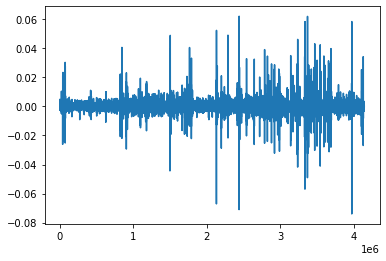

In [ ]:
plt.plot(dat['EDA_Phasic'])

In [ ]:
d=nk.eda_phasic(EDA_Chest,700)

NameError: name 'nk' is not defined

In [ ]:
plt.plot(d['EDA_Phasic'])

NameError: name 'd' is not defined

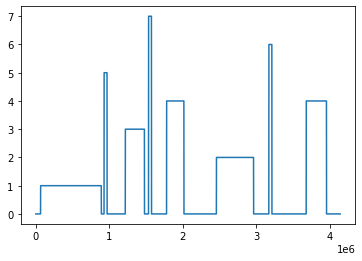

In [ ]:
plt.plot(Labels)

In [ ]:
EDA_windows=biobss.signaltools.naive_segment(EDA_Chest,window_size=120,overlap_size=120,sampling_rate=700)

In [ ]:
f=biobss.edatools.feature_extraction.from_windows(EDA_windows,sr=700,parallel=False)

TypeError: cannot concatenate object of type '<class 'dict'>'; only Series and DataFrame objs are valid

In [ ]:
len(EDA_windows)

49

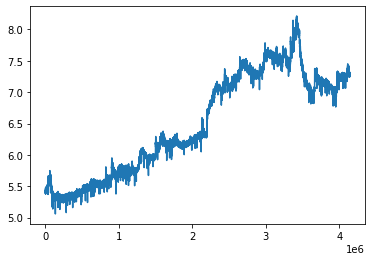

In [ ]:
plt.plot(EDA_Chest)

In [ ]:
from scipy.signal import butter, lfilter
from scipy import signal
def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [ ]:
w=EDA_windows[40]
w=nk.eda_clean(w,method='biosppy')
d=nk.eda_phasic(w,700)

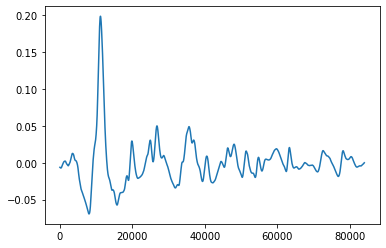

In [ ]:
plt.plot(d['EDA_Phasic'])
nk.eda_phasic

In [ ]:
w=w.flatten()
scr=nk.signal_filter(w,700,0.2,1)
scr_rms=np.sqrt((scr**2).sum()/len(scr))
peaks = signal.find_peaks(scr,height=scr_rms)

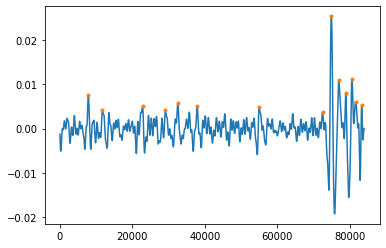

In [ ]:
plt.plot(scr)
plt.plot(peaks[0],scr[peaks[0]], marker="o", ls="", ms=3 )


In [ ]:
pn=[]
ts=[]
h=[]
t_scr=nk.signal_filter(EDA_Chest.flatten(),700,0.2,1) 
scr_rms=np.sqrt((t_scr**2).sum()/len(t_scr))

scr_rms=np.sqrt((scr**2).sum()/len(scr))
for w in EDA_windows:
    w=w.flatten()
    scr=nk.signal_filter(w,700,0.2,1)    
    peaks,info = signal.find_peaks(scr,height=scr_rms)
    pn.append(len(peaks))
    h.append(info['peak_heights'].sum())
    ts.append(scr_rms)

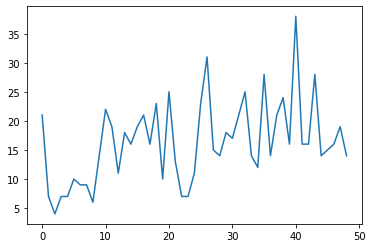

In [ ]:
plt.plot(pn)